In [1]:
import pandas as pd

df = pd.read_csv('marketing_data.csv')
df.isnull().sum()
df.info()
# df.columns
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [2]:
print(df[' Income '].head(10))
# did this to test my visual observation that there were spaces in this column name 


0    $84,835.00 
1    $57,091.00 
2    $67,267.00 
3    $32,474.00 
4    $21,474.00 
5    $71,691.00 
6    $63,564.00 
7    $44,931.00 
8    $65,324.00 
9    $65,324.00 
Name:  Income , dtype: object


In [3]:
##  1. After importing the data, examine variables such as Dt_Customer and Income to verify their accurate importation.  
print(df.columns.tolist()) # to take a look at the column names in case there are a little different to how the assignment refers to them


['ID', 'Year_Birth', 'Education', 'Marital_Status', ' Income ', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Response', 'Complain', 'Country']


In [4]:
# I notice there is a space in income
df.columns = df.columns.str.strip() # may as well address this issue with all the column names
print(df.columns.tolist()) # print to check and see if it's corrected.  

# the list of columns is small enough to visually check the rest of them for similar issues.  If it was a really large dataset, I would proactively strip them all.  If there were any unnecessary special characters in the column names I would get rid of those too but I don't see any here.

['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Response', 'Complain', 'Country']


In [5]:
print(df['Dt_Customer']) # I want to look at the date data and see the dtype.          

0        6/16/14
1        6/15/14
2        5/13/14
3        5/11/14
4         4/8/14
          ...   
2235      3/7/13
2236     1/22/13
2237     12/3/12
2238    11/29/12
2239      9/1/12
Name: Dt_Customer, Length: 2240, dtype: object


In [6]:
# This data is not in the correct datetime format (as also we learn from .info the datatype is an object) so I need to convert it.

In [7]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%m/%d/%y') # I had to play around with this format which I learned is to match the current format, before changing to datetime format.
print(df['Dt_Customer'].head()) # to see if it works


0   2014-06-16
1   2014-06-15
2   2014-05-13
3   2014-05-11
4   2014-04-08
Name: Dt_Customer, dtype: datetime64[ns]


In [8]:
## 2. There are missing income values for some customers. Conduct missing value imputation, considering that customers with similar education and marital status tend to have comparable yearly incomes, on average. It may be necessary to cleanse the data before proceeding. Specifically, scrutinize the categories of education and marital status for data cleaning.  
print(df['Income'].head(10)) # first see what the data looks like


0    $84,835.00 
1    $57,091.00 
2    $67,267.00 
3    $32,474.00 
4    $21,474.00 
5    $71,691.00 
6    $63,564.00 
7    $44,931.00 
8    $65,324.00 
9    $65,324.00 
Name: Income, dtype: object


In [9]:
# convert income to numeric 
df['Income'] = df['Income'].replace({'\$': '', ',': ''}, regex=True).astype(float) # get rid of dollar signs, commas and spaces and replace with nothing (empty string)
# check to see if it worked
print(df['Income'].head())

                          

0    84835.0
1    57091.0
2    67267.0
3    32474.0
4    21474.0
Name: Income, dtype: float64


In [10]:
print("Missing Income values:", df['Income'].isnull().sum()) # just to find out the number of null values


Missing Income values: 24


In [11]:
# so if I want to fill in the missing income values with the mean of what would be similar education and marital status, I want to take a look at that data first and see if anything needs to be cleaned up before I start working with it.
print(df['Education'].unique())
print(df['Marital_Status'].unique())


['Graduation' 'PhD' '2n Cycle' 'Master' 'Basic']
['Divorced' 'Single' 'Married' 'Together' 'Widow' 'YOLO' 'Alone' 'Absurd']


In [12]:
# some of the oddball answers for marital status could be a problem so checking to see how frequent they are and if I need to do anything with them
print(df['Marital_Status'].value_counts())


Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
YOLO          2
Absurd        2
Name: count, dtype: int64


In [13]:
# decided to group the marital status oddball entries in with "single" 
df['Marital_Status'] = df['Marital_Status'].replace({'Alone': 'Single', 'YOLO': 'Single', 'Absurd': 'Single'})
# see if it worked
print(df['Marital_Status'].value_counts())

Marital_Status
Married     864
Together    580
Single      487
Divorced    232
Widow        77
Name: count, dtype: int64


In [14]:
group_means = df.groupby(['Education', 'Marital_Status'])['Income'].mean().round(2) # this shows the mean income by marital status in each education group and rounds the number to two decimal points.
print(group_means) # to see what it looks like



Education   Marital_Status
2n Cycle    Divorced          49395.13
            Married           46201.10
            Single            53673.94
            Together          44736.41
            Widow             51392.20
Basic       Divorced           9548.00
            Married           21960.50
            Single            18238.67
            Together          21240.07
            Widow             22123.00
Graduation  Divorced          54526.04
            Married           50800.26
            Single            51365.63
            Together          55758.48
            Widow             54976.66
Master      Divorced          50331.95
            Married           53286.03
            Single            53787.14
            Together          52109.01
            Widow             58401.55
PhD         Divorced          53096.62
            Married           58138.03
            Single            53039.67
            Together          56041.42
            Widow             60288.0

In [15]:
# defining the function to fill in missing income values based on the mean values corresponding to similar groups
# tried a python function and it worked
# def impute_income(row):
#     if pd.isnull(row['Income']):
#         try:
#             return group_means.loc[(row['Education'], row['Marital_Status'])]
#         except KeyError:
#             return df['Income'].mean()  # Fallback option
#     return row['Income']

# df['Income'] = df.apply(impute_income, axis=1)
# # confirm this worked
# print("Remaining missing Income values:", df['Income'].isnull().sum())

# Went with pandas groupby because that's how we learned it in class (and it's less lines of code):

group_mean = df.groupby(['Education', 'Marital_Status'])['Income'].transform('mean')

# Use fillna() to fill missing values with the corresponding group mean
df['Income'] = df['Income'].fillna(group_mean)
# in case there are still missing values, just use the overall mean value for income
df['Income'] = df['Income'].fillna(df['Income'].mean())

print("Remaining missing Income values:", df['Income'].isnull().sum())


Remaining missing Income values: 0


In [16]:
# 3. Create variables to represent the total number of children, age, and total spending.  Derive the total purchases from the number of transactions across the three channels.
# make new column for all children
df['Total_Children'] = df['Kidhome'] + df['Teenhome']
# get the age of the children (using 2014 because that's what the Dt_customer dates are from
df['Age'] = 2014 - df['Year_Birth']
df.columns # check if it worked

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country', 'Total_Children',
       'Age'],
      dtype='object')

In [17]:
# add a column for total spending
df['Total_Spending'] = (df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] +
                        df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds'])
# for the number of transactions accross the three chanels
df['Total_Purchases'] = (df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'])
# check if it makes sense
print(df[['Total_Children', 'Age', 'Total_Spending', 'Total_Purchases']].head(10))

   Total_Children  Age  Total_Spending  Total_Purchases
0               0   44            1190               14
1               0   53             577               17
2               1   56             251               10
3               2   47              11                3
4               1   25              91                6
5               0   56            1192               16
6               0   60            1215               27
7               1   47              96                6
8               1   60             544               17
9               1   60             544               17


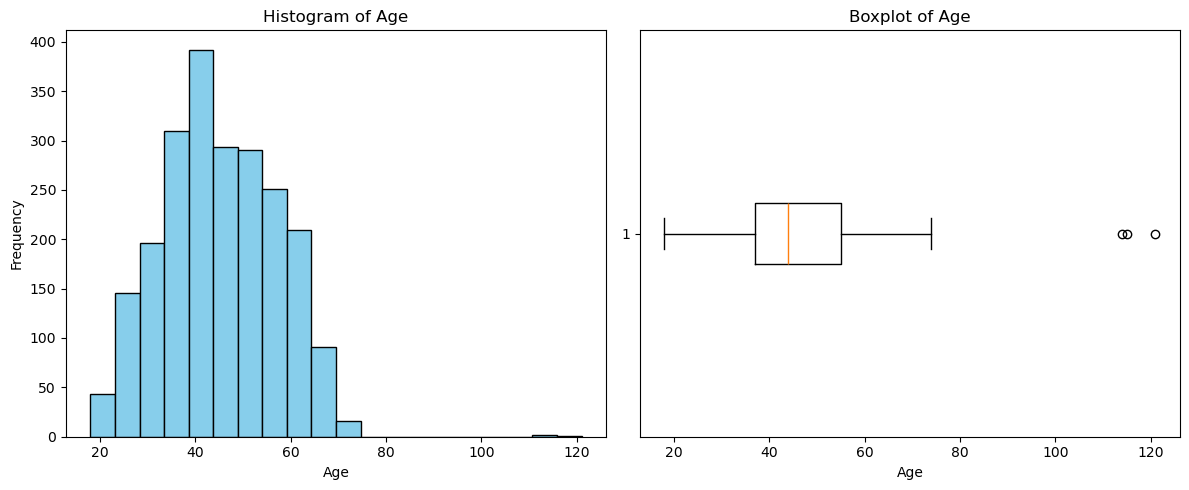

In [18]:
# 4. Generate box plots and histograms to gain insights into the distributions and identify outliers. Implement outlier treatment as needed. 

import matplotlib.pyplot as plt

# Histogram and Boxplot for Age
plt.figure(figsize=(12, 5))

# Histogram
plt.subplot(1, 2, 1)
plt.hist(df['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title("Histogram of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")

# Box Plot
plt.subplot(1, 2, 2)
plt.boxplot(df['Age'], vert=False)
plt.title("Boxplot of Age")
plt.xlabel("Age")

plt.tight_layout()
plt.show()


In [19]:
## the outliers in age are really skewing the data.  will use winsorize to fix the distribution
from scipy.stats.mstats import winsorize
df['winsorized_age'] = winsorize(df['Age'], limits=[0.05, 0.05])

# check if it worked
print(df['winsorized_age'].head())

0    44
1    53
2    56
3    47
4    26
Name: winsorized_age, dtype: int64


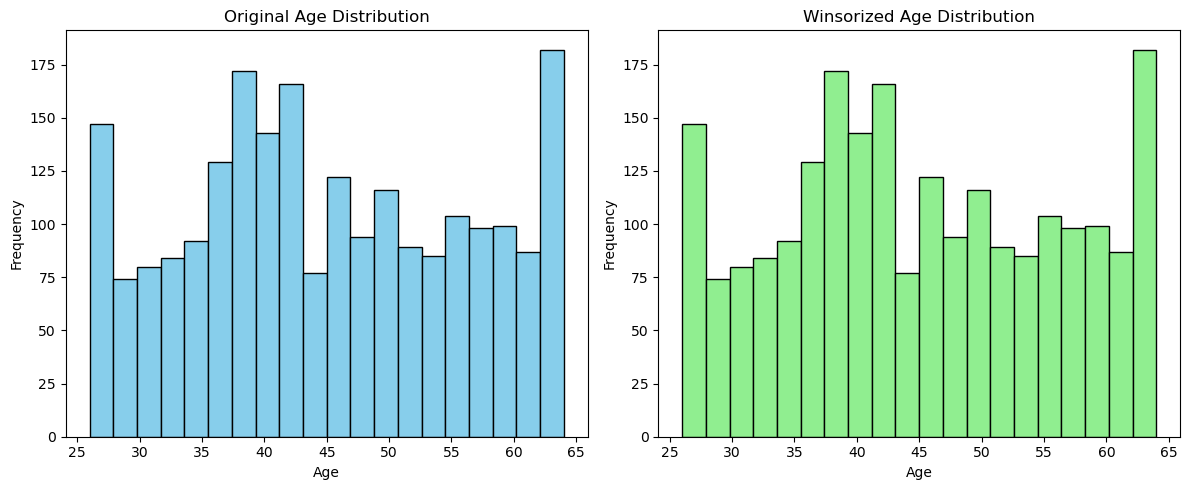

In [20]:
## visually see how this looks now after winsorizing the data for the outliers
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Histogram for original Age
plt.subplot(1, 2, 1)
plt.hist(df['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title("Original Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")

# Histogram for winsorized Age
plt.subplot(1, 2, 2)
plt.hist(df['winsorized_age'], bins=20, color='lightgreen', edgecolor='black')
plt.title("Winsorized Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


In [21]:
# 5. Apply ordinal and one-hot encoding based on the various types of categorical variables.  
## define the order for education
education_order = ['Basic', '2n Cycle', 'Graduation', 'Master', 'PhD']
education_mapping = {level: i for i, level in enumerate(education_order)}
## create an ordinal column for Education
df['education_ordinal'] = df['Education'].map(education_mapping)
# I researched this ordinal function and found it in python but also learned I could have used scikit OrdinalEncoder as well
print(df[['Education', 'education_ordinal']].head(20)) # had to print out more because the first .head() was all the same in the first 5 and thought maybe I did it wrong.

     Education  education_ordinal
0   Graduation                  2
1   Graduation                  2
2   Graduation                  2
3   Graduation                  2
4   Graduation                  2
5          PhD                  4
6     2n Cycle                  1
7   Graduation                  2
8          PhD                  4
9          PhD                  4
10    2n Cycle                  1
11      Master                  3
12         PhD                  4
13  Graduation                  2
14  Graduation                  2
15  Graduation                  2
16  Graduation                  2
17         PhD                  4
18    2n Cycle                  1
19      Master                  3


In [22]:
# use one hot encoding for marital status
# this will create new columns for each unique value in the column for Marital_Status and assign it a boolea 1 or 0 in the row to associate that row with having that unique value (1) or not (0).
df = pd.get_dummies(df, columns=['Marital_Status'], prefix='Marital') # prefix is parameter that could be set to anything to indicate where it came from and keep it consistent.
print(df.columns) # check if it worked

Index(['ID', 'Year_Birth', 'Education', 'Income', 'Kidhome', 'Teenhome',
       'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Response', 'Complain', 'Country', 'Total_Children', 'Age',
       'Total_Spending', 'Total_Purchases', 'winsorized_age',
       'education_ordinal', 'Marital_Divorced', 'Marital_Married',
       'Marital_Single', 'Marital_Together', 'Marital_Widow'],
      dtype='object')


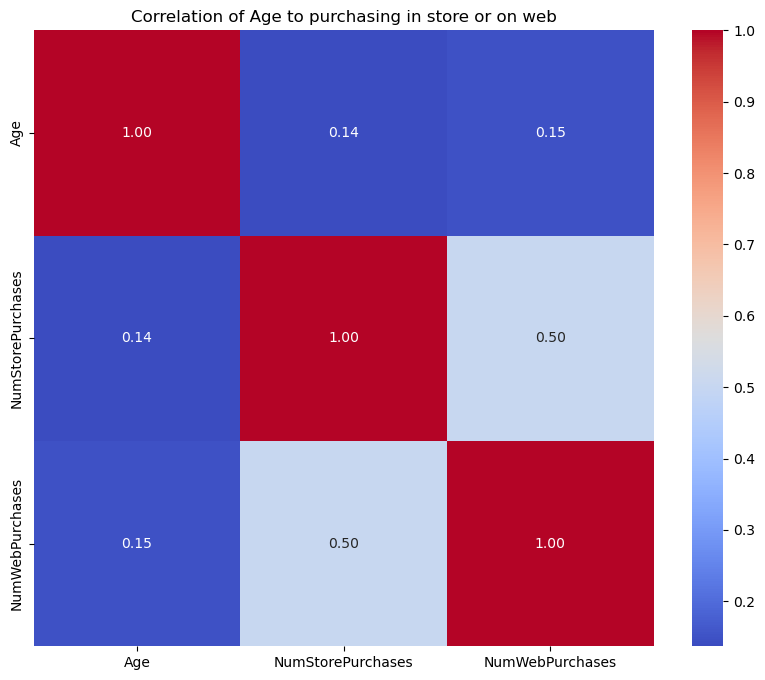

In [23]:
# 6. Generate a heatmap to illustrate the correlation between different pairs of variables.  
## considering the upcoming steps in the assignment, I will look at the correlation between age and store purchases vs. web purchases
import seaborn as sns
import matplotlib.pyplot as plt
## define which columns I want to look at for correlation
cols_to_correlate = ['Age', 'NumStorePurchases', 'NumWebPurchases']
## compute the correlation
corr_subset = df[cols_to_correlate].corr()
## set up matplotlib figure
plt.figure(figsize=(10, 8))
## use seaborn for the heatmap using parameters I picked out on the seaborn documentation 
sns.heatmap(corr_subset, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation of Age to purchasing in store or on web")

plt.show()

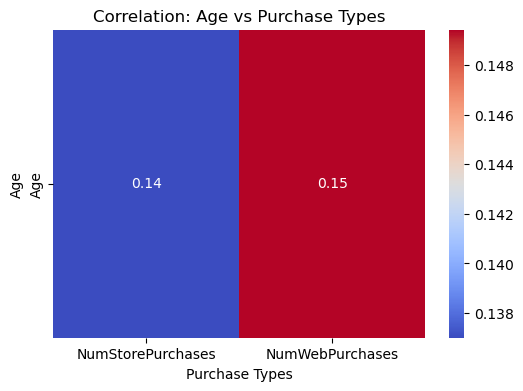

In [24]:
## restructuring the heatmap to show age and purhase type on different axes
# Create a custom DataFrame with correlations between Age and purchase variables because the heatmap above doesn't appear to show a correlation between age and whether purchase are made in the store or on the web.
custom_corr = df[['Age']].join(df[['NumStorePurchases', 'NumWebPurchases']])
custom_corr = custom_corr.corr().loc[['Age'], ['NumStorePurchases', 'NumWebPurchases']]
plt.figure(figsize=(6, 4))
sns.heatmap(custom_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation: Age vs Purchase Types")
plt.xlabel("Purchase Types")
plt.ylabel("Age")
plt.show()


In [25]:
# 7. Test the following hypotheses:  
   ## 7A Older individuals may not possess the same level of technological proficiency and may, therefore, lean toward traditional in-store shopping preferences.  
   ## 7B Customers with children likely experience time constraints, making online shopping a more convenient option.  
   ## 7C Sales at physical stores may face the risk of cannibalization by alternative distribution channels.  
   ## 7D Does the United States significantly outperform the rest of the world in total purchase volumes?  

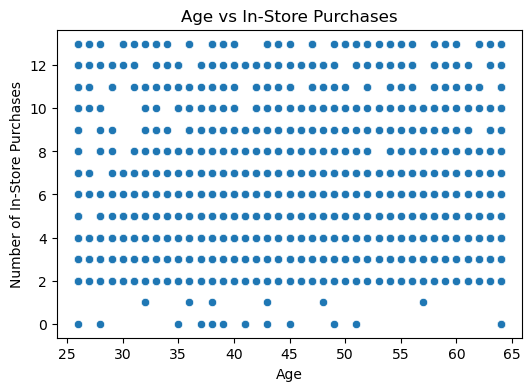

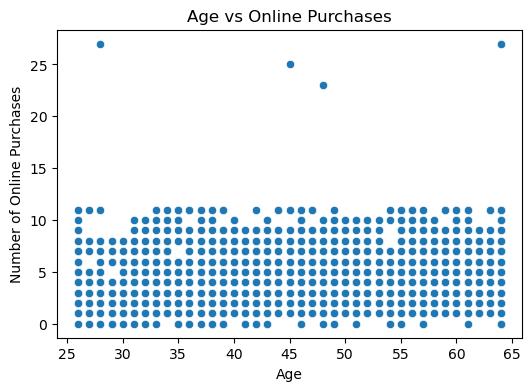

Correlation (Age vs In-Store Purchases): 0.14
Correlation (Age vs Online Purchases): 0.15


In [26]:
## 7A Hypothesis: Older individuals lean toward traditional in-store shopping preferences.  (Spoiler alert, the heatmap says not true, but I will do a scatter graph to look at the data better.)
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot: Age vs In-Store Purchases
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='Age', y='NumStorePurchases')
plt.title("Age vs In-Store Purchases")
plt.xlabel("Age")
plt.ylabel("Number of In-Store Purchases")
plt.show()

# Scatter plot: Age vs Online Purchases
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='Age', y='NumWebPurchases')
plt.title("Age vs Online Purchases")
plt.xlabel("Age")
plt.ylabel("Number of Online Purchases")
plt.show()

# Print correlation coefficients
corr_instore = df['Age'].corr(df['NumStorePurchases'])
corr_web = df['Age'].corr(df['NumWebPurchases'])
print("Correlation (Age vs In-Store Purchases):", round(corr_instore, 2))
print("Correlation (Age vs Online Purchases):", round(corr_web, 2))



In [27]:
## for the official hypothesis test for age and store vs. web purchases, the 2 sample T-test is used comparing the mean values of the separated samples for two different age groups.

from scipy.stats import ttest_ind

# Define age groups for test (in this case I chose 50) to create two groups:
older = df[df['Age'] >= 50]['NumStorePurchases']
younger = df[df['Age'] < 50]['NumStorePurchases']
# By looking at the scatter graph I can see there is no notable break in the age groups where the purchases are online or in store.
# Perform independent two-sample t-test:
t_stat, p_value = ttest_ind(older, younger, equal_var=False)  # equal_var=False for Welch's t-test (so not assuming that the two age groups hav equal variances)
print("t-statistic:", t_stat)
print("p-value:", p_value)


t-statistic: 6.470077671069668
p-value: 1.2944790125372907e-10


In [28]:
## Output shows that the p-value is significanly lower than the t-stat so the hypothesis is rejected.  It is not true that older people will purhase in the store more often than they will purchase online.

In [29]:
## 7B Hypothesis: Customers with children likely experience time constraints, making online shopping a more convenient option. 
## This will also be a two sample T test because we can separate the two groups (with and without kids) to have independent mean values for shopping online or instore.
# Define groups based on Total_Children
with_children = df[df['Total_Children'] > 0]['NumWebPurchases']
without_children = df[df['Total_Children'] == 0]['NumWebPurchases']

# Perform independent two-sample t-test (Welch's t-test)
t_stat, p_value = ttest_ind(with_children, without_children, equal_var=False)
print("t-statistic:", t_stat)
print("p-value:", p_value)


t-statistic: -3.541893836382714
p-value: 0.0004108102700005601


In [30]:
## output shows the p-value significantly lower than .05 and the negative t-stat indicates that the opposite might be true, so we reject the hypothesis that people with children are more likely to purchase online than in the store.

In [31]:
## 7C Hypothesis:  Sales at physical stores may face the risk of cannibalization by alternative distribution channels.  
## Check if there a negative relationship between in store sales and online sales using Pearson correlation from scipy
from scipy.stats import pearsonr

corr_coef, p_value = pearsonr(df['NumStorePurchases'], df['NumWebPurchases'])
print("Pearson correlation coefficient:", corr_coef)
print("p-value:", p_value)


Pearson correlation coefficient: 0.502713413299732
p-value: 8.962802398081327e-144


In [32]:
## output shows a p-value near zero with the perason correlation coefficient of .50 so there is a statistically significant relationship between in store and onlines sales.
## but it is not what the hypothesis posits.  It is the opposite; as online sales increase, so does in store sales.  Hypothesis is rejected.

In [33]:
## 7D Hypothesis: Does the United States significantly outperform the rest of the world in total purchase volumes?  
## Because the data can be grouped in two groups with independent mean values, the two sample t-test

# For US customers (Country code "US")
us_purchases = df[df['Country'] == 'US']['Total_Purchases']

# For non-US customers
non_us_purchases = df[df['Country'] != 'US']['Total_Purchases']

# just curious to see the amount of data coming from US and Non-US before I test the hypothesis
print("US customers:", len(us_purchases))
print("Non-US customers:", len(non_us_purchases))

# Now I just want to see the actual volume of US vs Non-US sales
print("Total all sales:", df['Total_Purchases'].sum())
total_us_sales = df[df['Country'] == 'US']['Total_Purchases'].sum()
print("Total US Sales:", total_us_sales)


US customers: 109
Non-US customers: 2131
Total all sales: 28083
Total US Sales: 1473


In [34]:
# The data alone suggest that the US Sales is not higher than all of the rest of the countries put together.  So maybe I misunderstand the hypothesis the way it is written.
# The hypothesis "Does the United States significantly outperform the rest of the world in total purchase volumes?" 
# Maybe the intention is to see if average sales for US customers is higher than average sales of non-US customers?
from scipy.stats import ttest_ind

# Create groups based on Country code 'US'
us_purchases = df[df['Country'] == 'US']['Total_Purchases'] 
non_us_purchases = df[df['Country'] != 'US']['Total_Purchases'] 

# Perform the t-test (Welch's t-test)
t_stat, p_value = ttest_ind(us_purchases, non_us_purchases, equal_var=False)
print("t-statistic:", t_stat)
print("p-value:", p_value)


t-statistic: 1.4681953545474953
p-value: 0.1446759042957516


In [35]:
## t-stat at 1.47 suggesting that the difference between the groups (US and all the others) is 1.47 standard errors away from zerp.
## p-value at .145 the probability of the null hypothesis is 14.5% which is too high to accept the hypothesis.
## The hypothesis is rejected that the US has significantly higher sales than the rest of the countries as a whole.

In [36]:
# 8. Use appropriate visualization to help analyze the following:  
   ## 8A Identify the top-performing products and those with the lowest revenue.  
   ## 8B Examine if there is a correlation between customers' age and the acceptance rate of the last campaign.  
   ## 8C Determine the country with the highest number of customers who accepted the last campaign.  
   ## 8D Investigate if there is a discernible pattern in the number of children at home and the total expenditure.  
   ## 8E Analyze the educational background of customers who lodged complaints in the last two years.

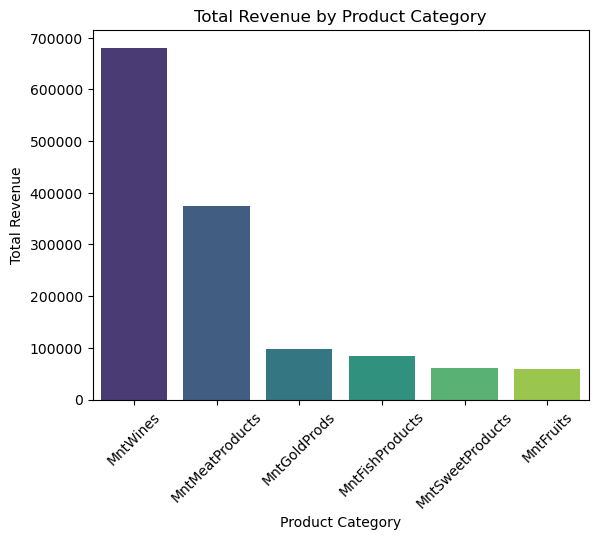

In [37]:
## 8A Identify the top-performing products and those with the lowest revenue.  
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Sum total spending for each product category
product_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
total_revenue = df[product_cols].sum().sort_values(ascending=False)

# Plot a bar chart
sns.barplot(x=total_revenue.index, y=total_revenue.values, 
            hue=total_revenue.index, palette='viridis', dodge=False)
plt.legend([], [], frameon=False)
plt.title("Total Revenue by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.show()



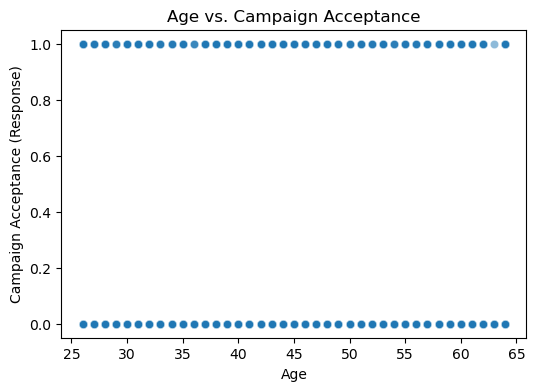

Point-biserial correlation coefficient: -0.02
p-value: 0.3186088501422738


In [38]:
## 8B Examine if there is a correlation between customers' age and the acceptance rate of the last campaign.  
# Scatter plot of Age vs. Response
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Age', y='Response', data=df, alpha=0.5)
plt.title("Age vs. Campaign Acceptance")
plt.xlabel("Age")
plt.ylabel("Campaign Acceptance (Response)")
plt.show()

# If Response is binary (the data is boolean - they either did or did not respond to campaign), you can also compute point-biserial correlation with scipy
from scipy.stats import pointbiserialr
corr_coef, p_val = pointbiserialr(df['Age'], df['Response'])
print("Point-biserial correlation coefficient:", round(corr_coef, 2))
print("p-value:", p_val)


In [39]:
## point bisarial correlation coefficient at -0.02 wit a p-value of .32 indicates that there is no linear relationship between age and acceptance of the last campaign.
## the correlation is essentially zero and the p-value > than .05 so no trend with age and the ad campaign


In [40]:
## 8C Determine the country with the highest number of customers who accepted the last campaign
## filter dataset to only include those who accepted the campaign
accepted_campaign_df = df[df['Response'] == 1]
## group by country and count
country_counts = accepted_campaign_df.groupby('Country').size().reset_index(name='Count')
country_counts = country_counts.sort_values(by='Count', ascending=False)
print(country_counts)


  Country  Count
6      SP    176
5      SA     52
1      CA     38
0     AUS     23
2     GER     17
3     IND     13
7      US     13
4      ME      2


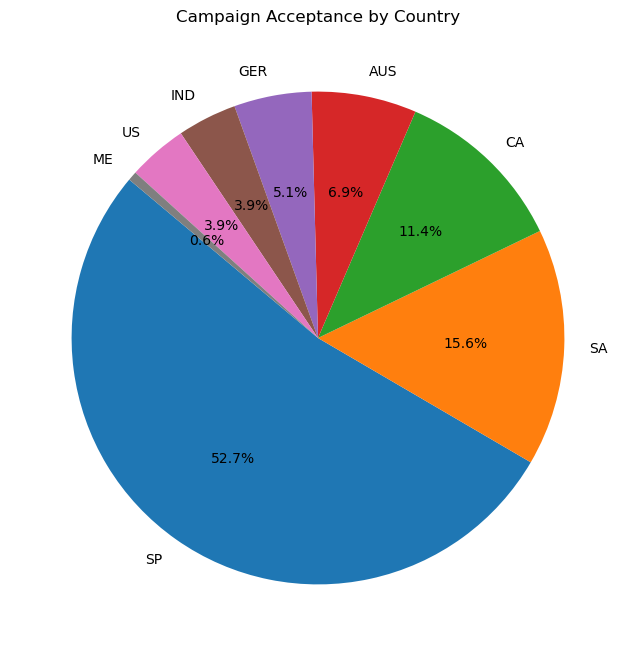

In [41]:
## pie chart with matplotlib
import matplotlib.pyplot as plt

# Assuming country_counts is your DataFrame from groupby with columns 'Country' and 'Count'
plt.figure(figsize=(8,8))
plt.pie(country_counts['Count'], labels=country_counts['Country'], autopct='%1.1f%%', startangle=140)
plt.title("Campaign Acceptance by Country")
plt.show()



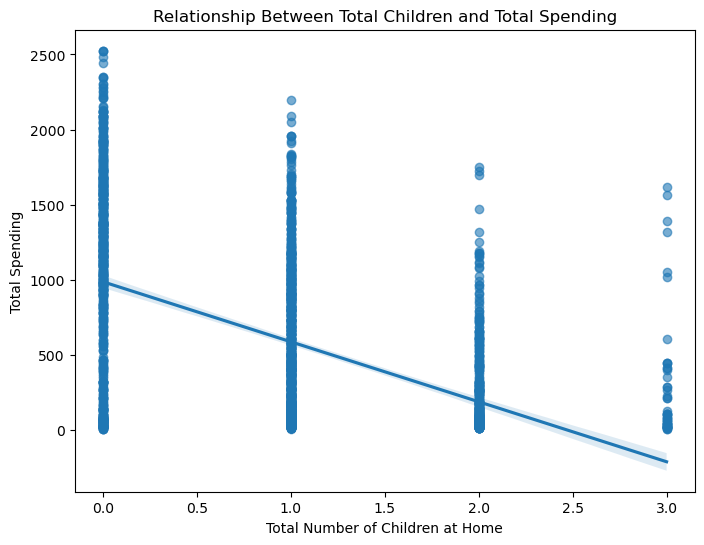

In [42]:
## 8D Investigate if there is a discernible pattern in the number of children at home and the total expenditure
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.regplot(x='Total_Children', y='Total_Spending', data=df, scatter_kws={'alpha':0.6})
plt.title("Relationship Between Total Children and Total Spending")
plt.xlabel("Total Number of Children at Home")
plt.ylabel("Total Spending")
plt.show()


In [43]:
## scatter graph shows a relationship between number of children and total expenditures in that the higher the amount of children, the less the expenditures

    Education  Count
0  Graduation     14
1    2n Cycle      4
2      Master      2
3         PhD      1


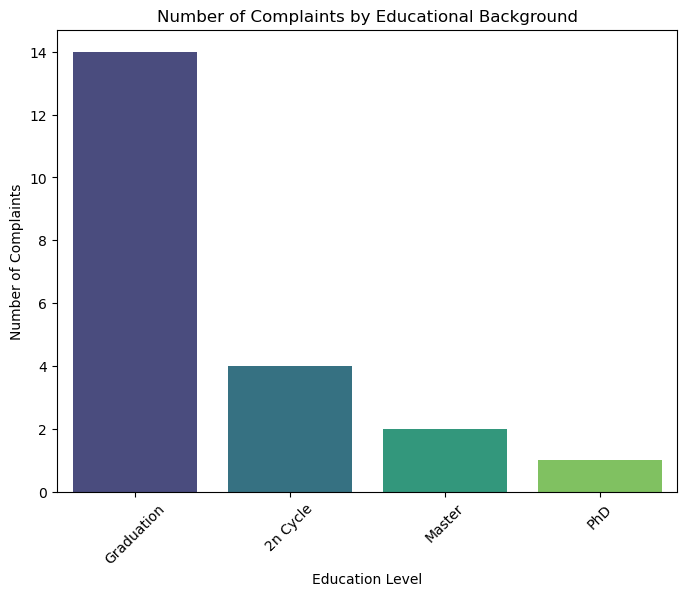

In [44]:
 ## 8E Analyze the educational background of customers who lodged complaints in the last two years
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filter for customers who lodged complaints
complainers = df[df['Complain'] == 1]

# Group by Education and count the number of complaints for each group
complaints_by_education = complainers['Education'].value_counts().reset_index()
complaints_by_education.columns = ['Education', 'Count']



print(complaints_by_education)

# Plot the results using seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x='Education', y='Count', data=complaints_by_education, hue='Education', palette='viridis', dodge=False)
plt.legend([], [], frameon=False)
plt.title("Number of Complaints by Educational Background")
plt.xlabel("Education Level")
plt.ylabel("Number of Complaints")
plt.xticks(rotation=45)
plt.show()


In [45]:
## output shows that the higher the education level, the less likely a customer is to complain